### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [1]:
# 데이터 확인 및 copy
import pandas as pd

path = './datasets/heart.csv'
h_f_df = pd.read_csv(path)
h_df = h_f_df.copy()
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
h_df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [3]:
h_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
h_df.drop_duplicates(inplace=True)
h_df.reset_index(inplace=True, drop=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

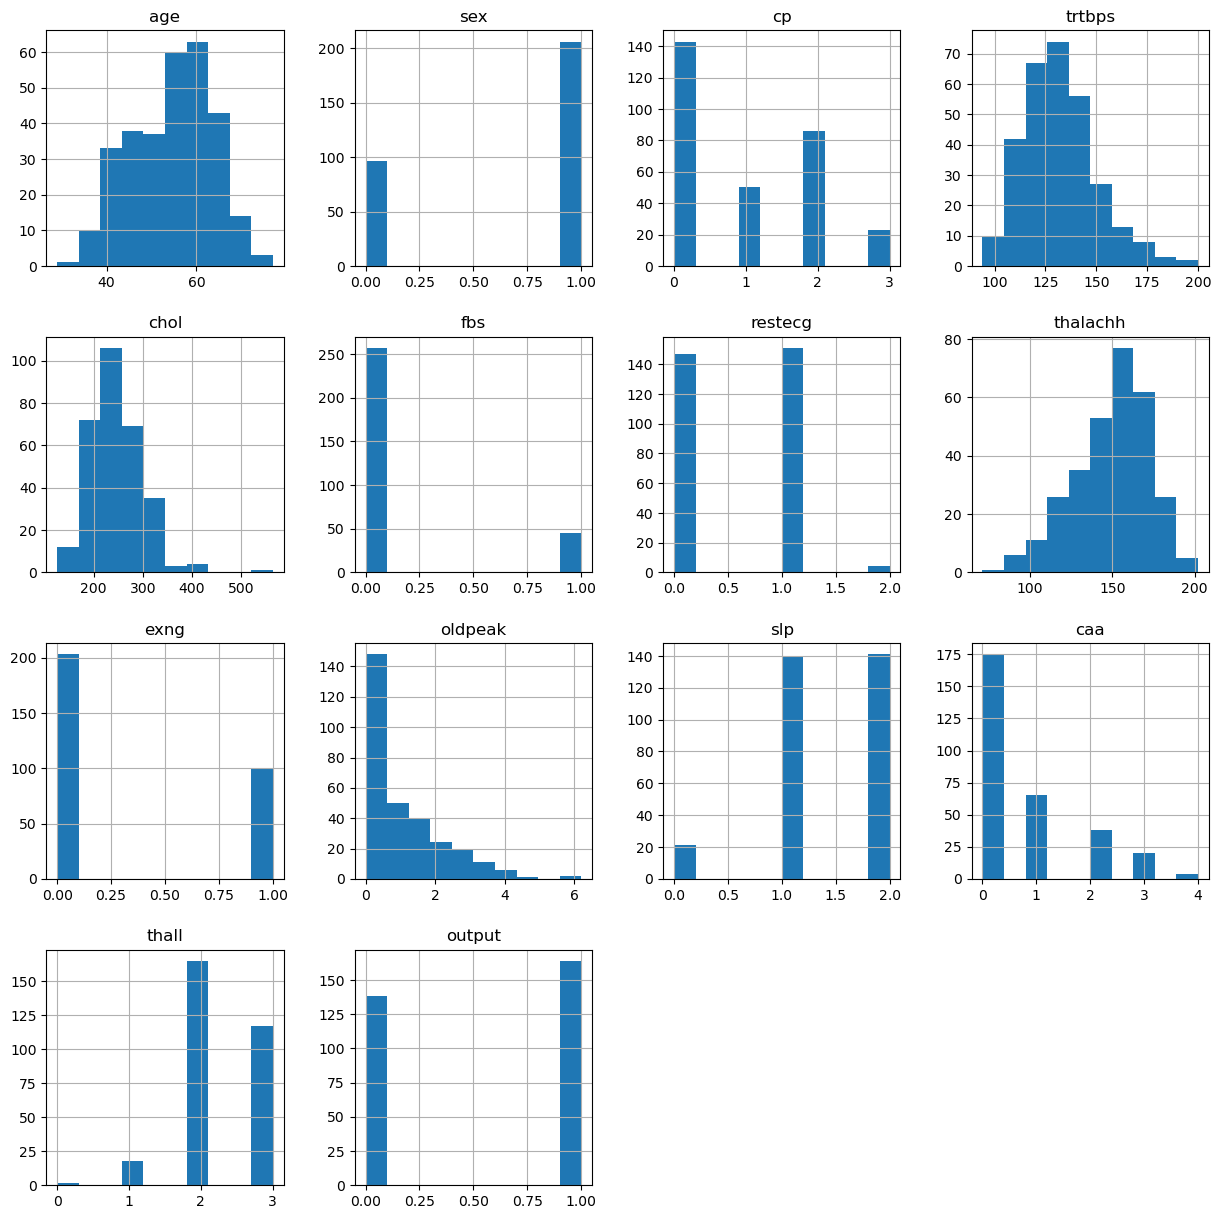

In [5]:
# 비중을 일기위한 시각화
h_df.hist(figsize = (15,15))

In [6]:
# 상관관계 확인
import seaborn as sns
import matplotlib.pyplot as plt

corr = h_df.corr()
corr


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [7]:
# 상관관계 확인
corr['output'].sort_values(ascending=False)[1:]

corr[['output']].sort_values(by='output', ascending=False)[1:]

,output
cp,0.432080
thalachh,0.419955
slp,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trtbps,-0.146269
age,-0.221476
sex,-0.283609
thall,-0.343101


<Axes: >

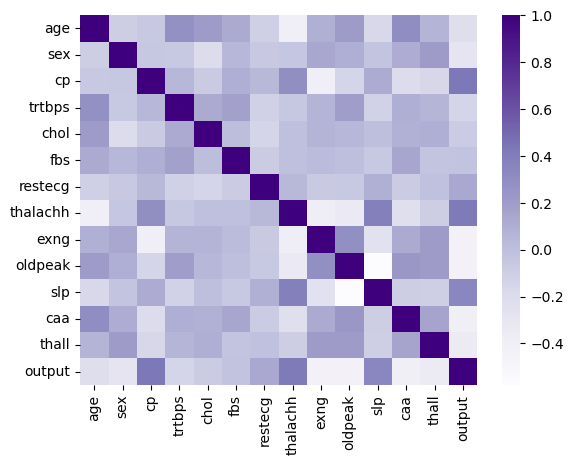

In [8]:
sns.heatmap(corr, cmap='Purples')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cp', ylabel='thalachh'>

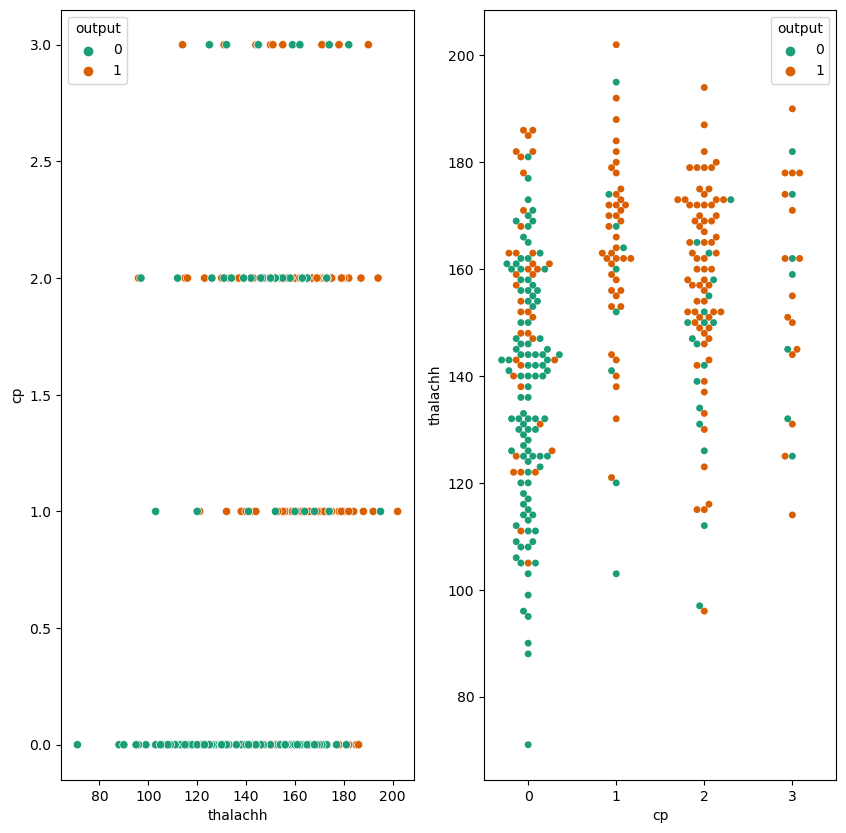

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.scatterplot(x='thalachh', y='cp', hue='output', data=h_df, palette='Dark2', ax=ax1)
sns.swarmplot(x='cp', y='thalachh', hue='output', data=h_df, palette='Dark2', ax=ax2)

In [10]:
# average= macro  사용권장
h_df['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [11]:
# 언더샘플링
output1 = h_df[h_df.output ==1].sample(138, random_state=124)
output0 = h_df[h_df.output ==0]

h_df = pd.concat([output1, output0]).reset_index(drop=True)

In [12]:
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
272,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
273,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
274,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = h_df.iloc[: ,:-1], h_df.iloc[:, -1]

# 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size = 0.2, random_state=124)

# 파라미터 설정
parameters = {
    'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100 ,1000],
    'svc__gamma' : [0.001, 0.01, 0.1, 1, 10, 100 ,1000],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 파이프 라인 설정 및 svc 
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 교차 검증
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv =3, refit=True, return_train_score=True)

# 훈련
g_svc.fit(X_train.values, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [14]:
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
272,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
273,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
274,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'][0])
display(result_df)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.630816,61
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.612551,72
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.630816,61
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.617055,70
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.630816,61
...,...,...,...
93,"{'svc__C': 1000, 'svc__gamma': 10, 'svc__kerne...",0.513452,81
94,"{'svc__C': 1000, 'svc__gamma': 100, 'svc__kern...",0.786190,38
95,"{'svc__C': 1000, 'svc__gamma': 100, 'svc__kern...",0.499938,85
96,"{'svc__C': 1000, 'svc__gamma': 1000, 'svc__ker...",0.786190,38


In [16]:
g_svc.best_estimator_

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma=0.1, probability=True))])

In [17]:
svc= g_svc.best_estimator_
prediction = svc.predict(X_test.values)


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[24  4]
 [10 18]]
정확도: 0.7500, 정밀도: 0.7500, 재현율: 0.7500, F1: 0.7500
################################################################################


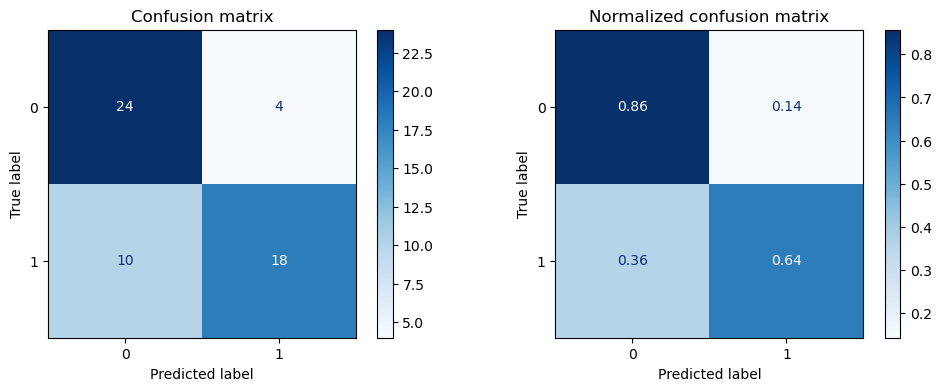

In [19]:
get_evaluation(y_test, prediction, svc, X_test.values)

In [22]:
from sklearn.inspection import permutation_importance

svc = SVC().fit(X_train, y_train)

importance = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()

for i in importance.importances_mean.argsort()[::-1]:
    print(f"{features.columns[i]}: {round(importance.importances_mean[i], 4)}")


thalachh: 0.1149
chol: 0.003
thall: 0.0
exng: 0.0
fbs: 0.0
cp: 0.0
sex: 0.0
slp: -0.0006
oldpeak: -0.0012
caa: -0.0042
restecg: -0.0077
age: -0.0119
trtbps: -0.0232
